# Telegram Analysis

## Prepare environment

In [1]:
"""
Set flag to true, if you work in visual studio code (connected to custom docker)
Set flag to false, if you work in browser (jupyter notebook ui from custom docker)
"""
FLAG_LOCAL              = True
"""
Set flag to true, if you want to work an a spot check (quick run)
"""
FlAG_WORK_ON_SPOT_CHECK = False

In [2]:
# Import default libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Import url libs
from urllib.parse import urlparse
from collections import Counter

# Set graph widget (used by jupyter notebook)
#%matplotlib notebook   #interactive graphs
%matplotlib inline

In [3]:
# Install and import Graph Lib
import networkx as nx
! pip install pydot

In [4]:
# Install and import  JSON Lib
! pip install demjson
import demjson

In [5]:
# Install and import Natural Language Toolkit
! pip install nltk
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Install and import WordCloud
! pip install wordcloud
from wordcloud import WordCloud

In [7]:
# Show all columns (pandas hides columns by default)
pd.set_option('display.max_columns', None)

In [8]:
# Set env vars
if(FLAG_LOCAL == True):
    dir_var = "./work/notebooks/"
else:
    dir_var = "./"

dir_var_output = dir_var + "output/"

# Debug output
! echo "- Workdir -"
! ls -al $dir_var

! echo
! echo "- Outputdir -"
! ls -al $dir_var_output

- Workdir -
total 7648
drwxr-xr-x  8 jovyan users     256 Dec 25 11:51 .
drwxr-xr-x  9 root   root      288 Dec 21 16:06 ..
drwxr-xr-x  5 jovyan users     160 Dec 20 10:22 data
-rw-r--r--  1 jovyan users    6148 Dec 22 16:15 .DS_Store
-rw-r--r--  1 jovyan users    5342 Dec 20 10:42 inputFiles.csv
drwxr-xr-x  3 jovyan users      96 Dec 20 10:30 .ipynb_checkpoints
drwxr-xr-x 11 jovyan users     352 Dec 25 12:25 output
-rwxr-xr-x  1 jovyan users 7813622 Dec 25 12:37 Telegram.ipynb

- Outputdir -
total 4888
drwxr-xr-x 11 jovyan users     352 Dec 25 12:25 .
drwxr-xr-x  8 jovyan users     256 Dec 25 11:51 ..
-rw-r--r--  1 jovyan users       0 Dec 21 14:19 .gitkeep
-rw-r--r--  1 jovyan users  152610 Dec 25 12:30 meta-overview.png
-rw-r--r--  1 jovyan users    8743 Dec 25 12:18 meta-text-length-hist.png
-rw-r--r--  1 jovyan users 1425012 Dec 25 12:31 social-graph.png
-rw-r--r--  1 jovyan users  545890 Dec 25 12:25 wordcloud-global.png
-rw-r--r--  1 jovyan users  514079 Dec 25 12:23 wordcloud-p

### Global functions

In [9]:
"""
Check if text is json formatted

param   text        InputText
param   singleMode  Boolean (set to true, if text is part of a message)
"""
def gloCheckIsTextJsonFormatted(text, singleMode):
    textString = str(text)
    if      (singleMode == False and textString.startswith("[") == True and textString.endswith("]") == True):
        return True
    elif    (singleMode == True and textString.startswith("{") == True and textString.endswith("}") == True):
        return True
    else:
        return False

In [10]:
dictGloStopwatches = dict()

# Start timer (for reporting)
def gloStartStopwatch(key):
    print("[Stopwatch started >>" + str(key) + "<<]")
    dictGloStopwatches[key] = time.time()

# Stop timer (for reporting)
def gloStopStopwatch(key):
    endTime     = time.time()
    startTime   = dictGloStopwatches[key]
    print("[Stopwatch stopped >>" + str(key) + "<< (" + '{:5.3f}s'.format(endTime-startTime) + ")]")

In [11]:
# Generate unique chat name
def gloConvertToSafeChatName(chatName):
    chatName = chatName.encode('ascii', 'ignore')
    chatName = chatName.decode('ascii')
    return chatName[:30]  

## Process input jobs

In [12]:
# Read jobs from file
dfInputFiles = pd.read_csv(dir_var + "inputFiles.csv", sep=";")

In [13]:
# See description above (generate spot check)
if(FlAG_WORK_ON_SPOT_CHECK == True):
    dfFilter = pd.DataFrame()

    dfFilter = dfFilter.append(dfInputFiles[dfInputFiles.inputName.str.contains("Xavier Naidoo")])
    dfFilter = dfFilter.append(dfInputFiles[dfInputFiles.inputName.str.contains("Oliver Janich")])
    dfFilter = dfFilter.append(dfInputFiles[dfInputFiles.inputName.str.contains("Eva Herman")])
    dfFilter = dfFilter.append(dfInputFiles[dfInputFiles.inputName.str.contains("ATTILA HILDMANN")])

    dfInputFiles = dfFilter

### Overview input jobs

In [14]:
dfInputFiles

inputName  \
0                                      FREIHEITS-CHAT   
1                           Oliver Janich oeffentlich   
2                            ATTILA HILDMANN OFFICIAL   
3                    Gerechtigkeit fuer das Vaterland   
4                          Corona Virus Informationen   
5                                             Liberte   
6                                  Golden Age Network   
7                                    Weltfrieden 2020   
8                                     Verschwoerungen   
9                               Digital Research Army   
10                                        StefanRaven   
11                               Eva Herman Offiziell   
12                        Xavier Naidoo (inoffiziell)   
13                                 Digitaler Chronist   
14                                Das Prinz Telegramm   
15                     Strahlenkranz V....Merci Danke   
16  Wissensbewahrung Absicherung/Videokanal, Kultu...   
17    Holistische Gesundheit, Heilung und Aufklaerung   
18                                Metropol Chronicles   
19                                       Kulturstudio   
20  Medizinjournalist Rainer Taufertshoefer (oeffe...   
21                 Die Deutsche Loesung - Aufklaerung   
22                      Die deutsche Loesung - Gruppe   
23                                     n8waechter.net   
24                                 Deutsche Patrioten   
25                            Patrioten im Widerstand   
26                              FREIHEITSCHAT - BLITZ   
27                                 Antiilluminaten TV   
28                       DieWahrheitundnurdieWahrheit   
29                                     ExpressZeitung   
30                                         Unzensiert   
31                                          Aufwachen   
32                                    Gesundheitsecke   
33                                Wissen ist Weisheit   
34                                     QAnons Channel   
35                                      Qanon Austria   
36              Freie Berichterstattung International   
37  Regellese und Diskussionsgruppe zum Xavier's M...   
38                                WIR sind VIEL mehr!   
39  FreiDenker oder doch eher Freiraus Poster - 08...   
40                                Freiheitdergedanken   
41  Querdenken (711 - STUTTGART) - Wir fuer das Gr...   
42    Holistische Gesundheit, Heilung und Aufklaerung   
43                            Fakten Frieden Freiheit   
44  BabylonDecoded Wissen und Erbe fuer die Nachwe...   
45  Die Zuversicht, Kulturgut, Wissensbewahrung, A...   
46          Holistisches Matrixdenken (uebergeordnet)   

                                            inputPath           inputType  \
0   DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat   public_supergroup   
1          DS-08-10-2020/ChatExport_2020-09-25-janich      public_channel   
2        DS-08-10-2020/ChatExport_2020-09-25-hildmann      public_channel   
3   DS-08-10-2020/ChatExport_2020-09-26-gerechtigk...      public_channel   
4      DS-08-10-2020/ChatExport_2020-09-26-cvirusinfo      public_channel   
5         DS-08-10-2020/ChatExport_2020-09-26-liberte      public_channel   
6       DS-08-10-2020/ChatExport_2020-09-26-goldenage      public_channel   
7   DS-08-10-2020/ChatExport_2020-09-26-weltfriede...      public_channel   
8   DS-08-10-2020/ChatExport_2020-09-26-verschwoer...      public_channel   
9   DS-08-10-2020/ChatExport_2020-09-27-digitalRes...      public_channel   
10    DS-08-10-2020/ChatExport_2020-09-27-stefanraven      public_channel   
11      DS-08-10-2020/ChatExport_2020-09-27-evaherman      public_channel   
12         DS-08-10-2020/ChatExport_2020-09-25-xavier      public_channel   
13  DS-08-10-2020/ChatExport_2020-09-29-digitalerC...      public_channel   
14  DS-08-10-2020/ChatExport_2020-09-29-prinzTelegram      public_channel   
15  DS-08-10-2020/ChatExport_2020-09-29-strahlenkranz      public_channel  

### Transform data into DataFrmaes

In [15]:
# Convert to DataFrame Meta (Chat Meta)
def convertToDataFrameMeta(filePath):
    dF = pd.read_json(dir_var + "data/" + filePath + "/result.json", encoding='utf-8')
    return dF

# Convert to DataFrame Messages (Chat Messages)
def convertToDataFrameMessages(filePath, dictMeta):
    dF = pd.json_normalize(dictMeta[filePath].messages)
    return dF

In [16]:
"""
Get params from extractedTextData
See cell below (key)
"""
def getExtractedTextDataParam(key, extractedTextData):
    a,b,c,d,e,f,g = extractedTextData
    switcher = {
        0: a,
        1: b,
        2: c,
        3: d,
        4: e,
        5: f,
        6: g
    }
    return switcher.get(key)

In [17]:
# TODO: href, mention and hashtags in normal text?

"""
Extract text data (see cell above key)
See cell above (key)

param   procIsJsonFormatted Boolean (is text json formatted?)
param   text                String  (text from message) 

return
a   procText            Plain Text
b   processedURLs       Array of URLs in Text
c   processedHashtags   Array of Hashtags in Text
d   processedBolds      Array of Bold Items in Text
e   processedItalics    Array of Italic Items in Text
f   processedUnderlines Array of Underlined Items in Text
g   processedEmails     Array of E-Mails in Text
"""
def extractTextData(procIsJsonFormatted, text):
    
    # 3 returns in this function...
    
    processedURLs       = list()
    processedHashtags   = list()
    processedBolds      = list()
    processedItalics    = list()
    processedUnderlines = list()
    processedEmails     = list()
    
    if(procIsJsonFormatted != True):
        #Is not JSON formatted (return normal text)
        return (text, processedURLs, processedHashtags, processedBolds, processedItalics, processedUnderlines, processedEmails)
    else:
        #Is is JSON formatted (try to parse)
        try:
            returnList = []
            jsonList = demjson.decode(str(text), encoding='utf8')

            # Do for each item in list
            for lItem in jsonList:

                messageString = str(lItem)

                isJsonSubString = gloCheckIsTextJsonFormatted(messageString, singleMode = True)

                if(isJsonSubString):
                    # Is Json Sub String
                    subJsonString = demjson.decode(str(messageString), encoding='utf8')
                    subJsonType = subJsonString["type"]

                    if(subJsonType == "bold"):
                        #text included
                        processedBolds.append(subJsonString["text"])
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "italic"):
                        #text included
                        processedItalics.append(subJsonString["text"])
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "underline"):
                        #text included
                        processedUnderlines.append(subJsonString["text"])
                        returnList.append(subJsonString["text"])
                    
                    elif(subJsonType == "email"):
                        #text included
                        processedEmails.append(subJsonString["text"])
                        
                    elif(subJsonType == "text_link"):
                        #text and href included
                        processedURLs.append(subJsonString["href"])
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "link"):
                        #text included
                        processedURLs.append(subJsonString["text"])
                        
                    elif(subJsonType == "hashtag"):
                        #text included
                        processedHashtags.append(subJsonString["text"])
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "mention"):
                        #text included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "mention_name"):
                        #text and user_id included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "bot_command"):
                        #text included
                        returnList = returnList 
                        
                    elif(subJsonType == "code"):
                        #text included
                        returnList = returnList
                        
                    elif(subJsonType == "phone"):
                        #text included
                        returnList = returnList
                        
                    elif(subJsonType == "strikethrough"):
                        #text included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "pre"):
                        #text and language included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "bank_card"):
                        #text included
                        returnList = returnList
                        
                    else:
                        print("- Error: Unkown json type >>" + str(subJsonType) + "<< (ignore) >>" + str(text) + "<<")

                else:
                    # Is no json formatted sub string (append text)
                    returnList.append(messageString)

            return (''.join(returnList), processedURLs, processedHashtags, processedBolds, processedItalics, processedUnderlines, processedEmails)
        
        except:
            # Parser error (set inputText to returnText)
            print("- Warn: Json parser error (set inputText to returnText) >>" + str(text) + "<<")
            return (text, processedURLs, processedHashtags, processedBolds, processedItalics, processedUnderlines, processedEmails)

In [18]:
def evalIsValidText(procTDTextLength):
    if(procTDTextLength > 0):
        return True
    else:
        return False

In [19]:
def evalContainsSomething(att):
    if(str(att) == "nan"):
        return False
    else:
        return True

In [20]:
gloStartStopwatch("Extract Text Data")

# Add Key = filePath / Value = DataFrame (Chat Meta)
dictMeta = {}
for fP in dfInputFiles.inputPath:
    dictMeta[fP] = convertToDataFrameMeta(fP)

# Add Key = filePath / Value = DataFrame (Chat Message)
dictMessages = {}
for fP in dfInputFiles.inputPath:

    gloStartStopwatch("TD-Extract " + fP)
    dfMessages                          = convertToDataFrameMessages(fP, dictMeta)
    
    # Get chat attributes and check if message is json formatted
    dfMessages["procChatFilePath"]      = fP
    dfMessages["procChatType"]          = dictMeta[fP].type.iloc[0]
    dfMessages["procIsJsonFormatted"]   = dfMessages["text"].apply(gloCheckIsTextJsonFormatted, singleMode = False)
    
    # Extract Text Data
    dfMessages["tmpExtractedTD"]        = dfMessages.apply(lambda x: extractTextData(x.procIsJsonFormatted, x.text), axis=1)

    # Extract Text Data (params)
    dfMessages["procTDText"]            = dfMessages.apply(lambda x: getExtractedTextDataParam(0, x.tmpExtractedTD), axis=1)
    dfMessages["procTDURLs"]            = dfMessages.apply(lambda x: getExtractedTextDataParam(1, x.tmpExtractedTD), axis=1)
    dfMessages["procTDHashtags"]        = dfMessages.apply(lambda x: getExtractedTextDataParam(2, x.tmpExtractedTD), axis=1)
    dfMessages["procTDBolds"]           = dfMessages.apply(lambda x: getExtractedTextDataParam(3, x.tmpExtractedTD), axis=1)
    dfMessages["procTDItalics"]         = dfMessages.apply(lambda x: getExtractedTextDataParam(4, x.tmpExtractedTD), axis=1)
    dfMessages["procTDUnderlines"]      = dfMessages.apply(lambda x: getExtractedTextDataParam(5, x.tmpExtractedTD), axis=1)
    dfMessages["procTDEmails"]          = dfMessages.apply(lambda x: getExtractedTextDataParam(6, x.tmpExtractedTD), axis=1)

    # Calc text size
    dfMessages["procTDTextLength"]      = dfMessages["procTDText"].str.len()

    # Add columns (if not exists)
    if "photo" not in dfMessages:
        print("- Warn: Add column >>photo<<")
        dfMessages["photo"] = np.nan

    if "file" not in dfMessages:
        print("- Warn: Add column >>file<<")
        dfMessages["file"] = np.nan

    if "edited" not in dfMessages:
        print("- Warn: Add column >>edited<<")
        dfMessages["edited"] = np.nan

    # Evaluate attributes
    dfMessages["procEvalIsValidText"]   = dfMessages.procTDTextLength.apply(evalIsValidText)
    dfMessages["procEvalContainsPhoto"] = dfMessages.photo.apply(evalContainsSomething)
    dfMessages["procEvalContainsFile"]  = dfMessages.file.apply(evalContainsSomething) 
    dfMessages["procEvalIsEdited"]      = dfMessages.edited.apply(evalContainsSomething)
    # TODO: Add more attributes (e.g. procEvalContainBoldItems)
    
    dictMessages[fP] = dfMessages
    gloStopStopwatch("TD-Extract " + fP)

    
# All Messages to DataFrame
gloStartStopwatch("Generate global DataFrame")
dfAllDataMessages = pd.DataFrame()
for fP in dfInputFiles.inputPath:
    dfMessages        = dictMessages[fP].copy()
    dfAllDataMessages = dfAllDataMessages.append(dfMessages)
gloStopStopwatch("Generate global DataFrame")

gloStopStopwatch("Extract Text Data")

[Stopwatch started >>Extract Text Data<<]
[Stopwatch started >>TD-Extract DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat<<]
- Warn: Json parser error (set inputText to returnText) >>[Nachweis hier einfügen]<<
[Stopwatch stopped >>TD-Extract DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat<< (175.464s)]
[Stopwatch started >>TD-Extract DS-08-10-2020/ChatExport_2020-09-25-janich<<]
[Stopwatch stopped >>TD-Extract DS-08-10-2020/ChatExport_2020-09-25-janich<< (53.294s)]
[Stopwatch started >>TD-Extract DS-08-10-2020/ChatExport_2020-09-25-hildmann<<]
[Stopwatch stopped >>TD-Extract DS-08-10-2020/ChatExport_2020-09-25-hildmann<< (18.278s)]
[Stopwatch started >>TD-Extract DS-08-10-2020/ChatExport_2020-09-26-gerechtigkeitVaterland<<]
[Stopwatch stopped >>TD-Extract DS-08-10-2020/ChatExport_2020-09-26-gerechtigkeitVaterland<< (0.929s)]
[Stopwatch started >>TD-Extract DS-08-10-2020/ChatExport_2020-09-26-cvirusinfo<<]
[Stopwatch stopped >>TD-Extract DS-08-10-2020/ChatExport_2020-09-26-cvirusinf

## Meta-Queries

### Type of channels (and only included in)

In [21]:
dfInputFiles.inputType.value_counts()

public_channel        38
public_supergroup      8
private_supergroup     1
Name: inputType, dtype: int64

In [22]:
#dfAllDataMessages.columns.difference(dfAllDataMessages[dfAllDataMessages.procChatType == "public_channel"].dropna(how='all', axis=1).columns)

In [23]:
#dfAllDataMessages.columns.difference(dfAllDataMessages[dfAllDataMessages.procChatType == "public_supergroup"].dropna(how='all', axis=1).columns)

In [24]:
# No enough data
#dfAllDataMessages.columns.difference(dfAllDataMessages[dfAllDataMessages.procChatType == "private_supergroup"].dropna(how='all', axis=1).columns)

### Define queries

In [25]:
def queryChatId(filePath):
    dfMeta = dictMeta[filePath].copy()
    return str(dfMeta["id"].iloc[0])

In [26]:
def queryChatName(filePath):
    dfMeta      = dictMeta[filePath].copy()
    chatName    = str(dfMeta["name"].iloc[0])
    chatName    = gloConvertToSafeChatName(chatName)
    return chatName

In [27]:
def queryChatType(filePath):
    dfMeta = dictMeta[filePath].copy()
    return str(dfMeta["type"].iloc[0])

In [28]:
def queryNumberOfMessages(filePath):
    dfMessages = dictMessages[filePath].copy()
    return len(dfMessages.index)

In [29]:
def queryNumberOfFormattedTextMessages(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.procIsJsonFormatted == True]
    return len(dfMessages.index)

In [30]:
def queryNumberOfValidTextMessages(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.procEvalIsValidText == True]
    return len(dfMessages.index)

In [31]:
def queryNumberOfPhotos(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.procEvalContainsPhoto == True]
    return len(dfMessages.index)

In [32]:
def queryNumberOfFiles(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.procEvalContainsFile == True]
    return len(dfMessages.index)

In [33]:
def queryNumberOfEditedMessages(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.procEvalIsEdited == True]
    return len(dfMessages.index)

### Execute queries

In [34]:
dfQueryMeta = pd.DataFrame(dfInputFiles.inputPath)

dfQueryMeta["qryChatId"]                        = dfQueryMeta.inputPath.apply(queryChatId)
dfQueryMeta["qryChatName"]                      = dfQueryMeta.inputPath.apply(queryChatName)
dfQueryMeta["qryChatType"]                      = dfQueryMeta.inputPath.apply(queryChatType)
dfQueryMeta["qryNumberOfMessages"]              = dfQueryMeta.inputPath.apply(queryNumberOfMessages)
dfQueryMeta["qryNumberOfFormattedTextMessages"] = dfQueryMeta.inputPath.apply(queryNumberOfFormattedTextMessages)
dfQueryMeta["qryNumberOfValidTextMessages"]     = dfQueryMeta.inputPath.apply(queryNumberOfValidTextMessages)
dfQueryMeta["qryNumberOfPhotos"]                = dfQueryMeta.inputPath.apply(queryNumberOfPhotos)
dfQueryMeta["qryNumberOfFiles"]                 = dfQueryMeta.inputPath.apply(queryNumberOfFiles)
dfQueryMeta["qryNumberOfEditedMessages"]        = dfQueryMeta.inputPath.apply(queryNumberOfEditedMessages)

dfQueryMeta.sort_values(by="qryNumberOfMessages", ascending=False)

inputPath    qryChatId  \
0   DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat   9717909816   
28  DS-08-10-2020/ChatExport_2020-10-02-chatDieWah...   9969119455   
38    DS-22-10-2020/ChatExport_2020-10-13-wirSindMehr   9788772075   
1          DS-08-10-2020/ChatExport_2020-09-25-janich   9808932799   
26  DS-08-10-2020/ChatExport_2020-10-01-freiheitsC...   9943834900   
30     DS-08-10-2020/ChatExport_2020-10-04-unzensiert   9725746662   
11      DS-08-10-2020/ChatExport_2020-09-27-evaherman   9915108907   
15  DS-08-10-2020/ChatExport_2020-09-29-strahlenkranz  10050449614   
37     DS-22-10-2020/ChatExport_2020-10-13-xavierChat   9907103286   
2        DS-08-10-2020/ChatExport_2020-09-25-hildmann  10034163583   
22    DS-08-10-2020/ChatExport_2020-09-30-deutscheLsg   9982253319   
39     DS-22-10-2020/ChatExport_2020-10-15-freiDenker   9836526551   
27  DS-08-10-2020/ChatExport_2020-10-02-antiillumi...  10060003597   
33  DS-22-10-2020/ChatExport_2020-10-12-wissenWeis...   9691754437   
9   DS-08-10-2020/ChatExport_2020-09-27-digitalRes...   9846664545   
19   DS-08-10-2020/ChatExport_2020-09-30-kulturstudio  10064728094   
12         DS-08-10-2020/ChatExport_2020-09-25-xavier   9874390332   
34  DS-22-10-2020/ChatExport_2020-10-12-qAnonsGermany   9804534747   
29  DS-08-10-2020/ChatExport_2020-10-03-expressZei...   9857073102   
35   DS-22-10-2020/ChatExport_2020-10-13-qanonAustria   9962163863   
8   DS-08-10-2020/ChatExport_2020-09-26-verschwoer...   9942502804   
31      DS-22-10-2020/ChatExport_2020-10-11-aufwachen   9683270591   
7   DS-08-10-2020/ChatExport_2020-09-26-weltfriede...   9850980068   
43  DS-22-10-2020/ChatExport_2020-10-20-faktenFrie...   9785934992   
41  DS-22-10-2020/ChatExport_2020-10-18-querdenken711   9812812343   
13  DS-08-10-2020/ChatExport_2020-09-29-digitalerC...  10068312319   
5         DS-08-10-2020/ChatExport_2020-09-26-liberte  10068807626   
32  DS-22-10-2020/ChatExport_2020-10-11-gesundheit...   9706227251   
25  DS-08-10-2020/ChatExport_2020-10-01-patriotenW...   9913028741   
4      DS-08-10-2020/ChatExport_2020-09-26-cvirusinfo   9917074801   
24  DS-08-10-2020/ChatExport_2020-10-01-deutschePatri   9785040372   
20  DS-08-10-2020/ChatExport_2020-09-30-rainerMedizin   9804874080   
6       DS-08-10-2020/ChatExport_2020-09-26-goldenage   9862302472   
40  DS-22-10-2020/ChatExport_2020-10-18-freiheitDe...  10013009712   
10    DS-08-10-2020/ChatExport_2020-09-27-stefanraven   9820850677   
14  DS-08-10-2020/ChatExport_2020-09-29-prinzTelegram   9742969264   
42  DS-22-10-2020/ChatExport_2020-10-18-holistisch...   9758769198   
17  DS-08-10-2020/ChatExport_2020-09-30-holistisch...   9758769198   
3   DS-08-10-2020/ChatExport_2020-09-26-gerechtigk...  10069007089   
16  DS-08-10-2020/ChatExport_2020-09-30-absicherun...   9779767132   
36  DS-22-10-2020/ChatExport_2020-10-13-freieBeric...   9935429847   
21  DS-08-10-2020/ChatExport_2020-09-30-deutscheAu...   9927244279   
46  DS-22-10-2020/ChatExport_2020-10-21-holistisch...   9894423174   
23  DS-08-10-2020/ChatExport_2020-10-01-nachtwaechter   9744633492   
18  DS-08-10-2020/ChatExport_2020-09-30-metropolChron   9919682714   
45  DS-22-10-2020/ChatExport_2020-10-21-zuversicht...   9770976019   
44  DS-22-10-2020/ChatExport_2020-10-21-babylonDec...  10002534295   

                       qryChatName         qryChatType  qryNumberOfMessages  \
0                   FREIHEITS-CHAT   public_supergroup               271554   
28    DieWahrheitundnurdieWahrheit   public_supergroup               113825   
38             WIR sind VIEL mehr!   public_supergroup                79384   
1          Oliver Janich ffentlich      public_channel                35040   
26           FREIHEITSCHAT - BLITZ   public_supergroup                31392   
30                      Unzensiert      public_channel                30814   
11            Eva Herman Offiziell      public_channel                26724   
15  Strahlenkranz V....Merci Danke      public_chan

### Plot meta queries

In [35]:
# Auto label query plot
def autolabelAx(rects, ax):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    Copied from https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html (22.12.2020)
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [36]:
def queryMetaPlotter():
    # Init data
    dataLabels                          = list()
    dataNumberOfMesssages               = list()
    dataNumberOfFormattedTextMessages   = list()
    dataNumberOfValidTextMessages       = list()
    dataNumberOfEditedMessages          = list()
    dataNumberOfPhotos                  = list()
    dataNumberOfFiles                   = list()

    # Iterate over Meta DataFrame
    for index, row in dfQueryMeta.sort_values(by="qryNumberOfMessages", ascending=False).iterrows():

        # Get attributes
        dataLabels                          .append(row.qryChatName)
        dataNumberOfMesssages               .append(row.qryNumberOfMessages)
        dataNumberOfFormattedTextMessages   .append(row.qryNumberOfFormattedTextMessages)
        dataNumberOfValidTextMessages       .append(row.qryNumberOfValidTextMessages)
        dataNumberOfEditedMessages          .append(row.qryNumberOfEditedMessages)
        dataNumberOfPhotos                  .append(row.qryNumberOfPhotos)
        dataNumberOfFiles                   .append(row.qryNumberOfFiles)

    # Convert list to array
    dataLabels                          = np.array(dataLabels)
    dataNumberOfMesssages               = np.array(dataNumberOfMesssages)
    dataNumberOfFormattedTextMessages   = np.array(dataNumberOfFormattedTextMessages)
    dataNumberOfValidTextMessages       = np.array(dataNumberOfValidTextMessages)
    dataNumberOfEditedMessages          = np.array(dataNumberOfEditedMessages)
    dataNumberOfPhotos                  = np.array(dataNumberOfPhotos)
    dataNumberOfFiles                   = np.array(dataNumberOfFiles)

    # Draw
    fig, ax = plt.subplots()
    x = np.arange(len(dataLabels))

    barWidth = 0.15

    fig.set_figwidth(64)
    fig.set_figheight(16)

    r1 = x
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    r6 = [x + barWidth for x in r5]

    rects1 = ax.bar(r1, dataNumberOfMesssages, barWidth, label='Messages')
    rects2 = ax.bar(r2, dataNumberOfFormattedTextMessages, barWidth, label='Formatted Messsages')
    rects3 = ax.bar(r3, dataNumberOfValidTextMessages, barWidth, label='Valid Messages')
    rects4 = ax.bar(r4, dataNumberOfEditedMessages, barWidth, label='Edited Messages')
    rects5 = ax.bar(r5, dataNumberOfPhotos, barWidth, label='with Photo')
    rects6 = ax.bar(r6, dataNumberOfFiles, barWidth, label='with File')

    ax.set_ylabel("Count")
    ax.set_title("Meta Overview")
    ax.set_xticks(x)
    ax.set_xticklabels(dataLabels)
    ax.legend()

    rects = [rects1, rects2, rects3, rects4, rects5, rects6]

    for rect in rects:
        autolabelAx(rect, ax)

    fig.tight_layout()

    plt.xticks(rotation=30)
    plt.savefig(dir_var_output + "meta-overview.png")
    plt.show()

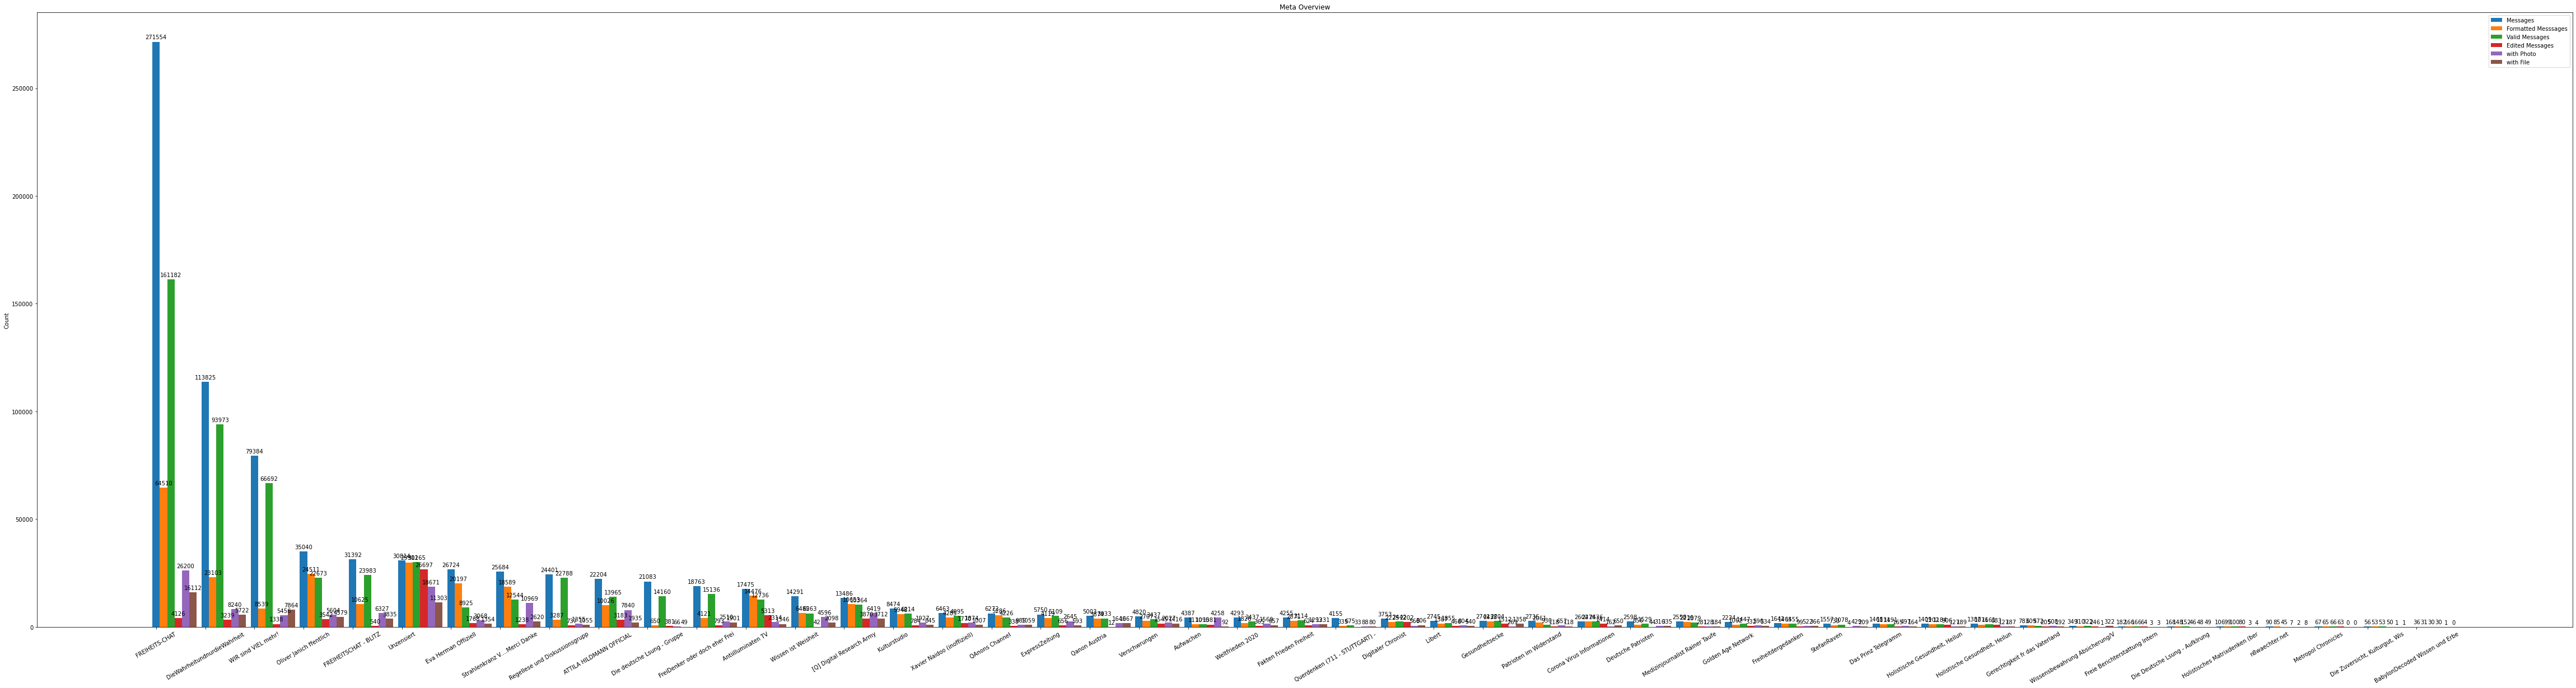

In [37]:
queryMetaPlotter()

### Get text-length

In [38]:
def removeTextLengthOutliersFromDataFrame(df, interval, maxTextLength):
    df = df.copy()
    df = df[df.procTDTextLength < maxTextLength]
    # https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
    # keep only the ones that are within <interval> to -<interval> standard deviations in the column 'Data'.
    return df[np.abs(df.procTDTextLength-df.procTDTextLength.mean()) <= (interval*df.procTDTextLength.std())]

In [39]:
def textLengthHistPlotter():
    dfMessages = dfAllDataMessages.copy()
    print("Number of all messages:\t\t\t\t\t\t" + str(len(dfMessages.index)))

    dfMessages = dfMessages[dfMessages.procEvalIsValidText == True]
    print("Number of valid text messages:\t\t\t\t\t" + str(len(dfMessages.index)))

    dfMessages = removeTextLengthOutliersFromDataFrame(
        dfMessages,
        interval = 3,         #default is 3
        maxTextLength = 750
        )
    print("Number of valid text messages (after outliers filtering):\t" + str(len(dfMessages.index)))

    print()
    print("Text Length Hist (after outliers filtering)")
    plt.figure(figsize=(16,9))
    _ = dfMessages.procTDTextLength.hist(bins=10)

    plt.savefig(dir_var_output + "meta-text-length-hist.png")

Number of all messages:						831260
Number of valid text messages:					573881
Number of valid text messages (after outliers filtering):	525575

Text Length Hist (after outliers filtering)


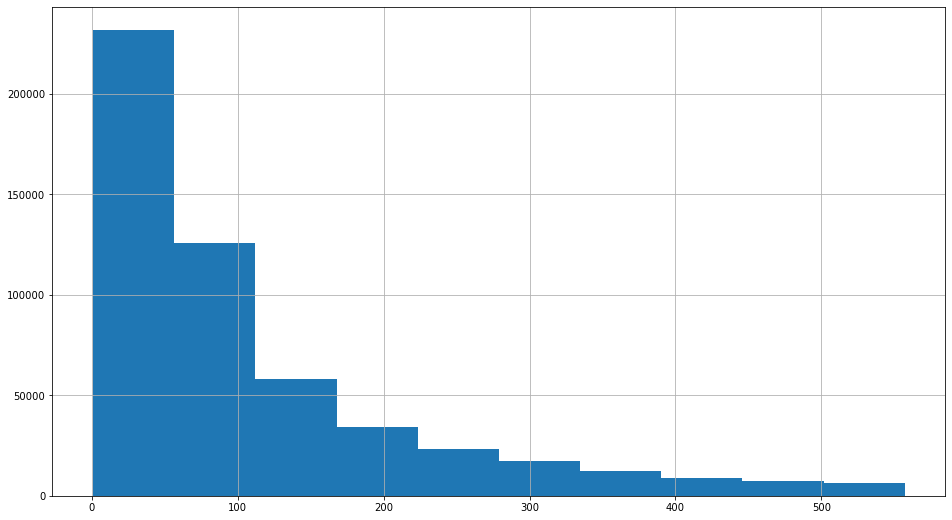

In [40]:
textLengthHistPlotter()

## Extract Important Hashtags

In [41]:
# TODO: Extract hashtags in non formatted text

def extractImportantHashtags(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.astype(str)["procTDHashtags"] != "[]"]

    hashTagList = list()
    for index, row in dfMessages.iterrows():
        for hashtagItem in row["procTDHashtags"]:
            hashTagList.append(hashtagItem)

    return Counter(hashTagList).most_common(20)

In [42]:
extractImportantHashtags("DS-08-10-2020/ChatExport_2020-09-25-janich")

[('#StopLeftDystopia', 96),
 ('#Berlin', 40),
 ('#links', 40),
 ('#Messer', 33),
 ('#Einreise', 32),
 ('#Justiz', 32),
 ('#Kosten', 31),
 ('#Netzfund', 24),
 ('#CoronaKrise', 20),
 ('#Clan', 16),
 ('#Hamburg', 16),
 ('#COVID1984_Lüge', 16),
 ('#Orwell', 15),
 ('#Hannover', 14),
 ('#Corona', 14),
 ('#Freiheit', 13),
 ('#GreatAwakening', 13),
 ('#Psychiatrie', 12),
 ('#QAnon', 12),
 ('#NEONREVOLT', 12)]

In [43]:
extractImportantHashtags("DS-08-10-2020/ChatExport_2020-09-27-evaherman")

[('#Abendgebet', 56),
 ('#abendgebet', 23),
 ('#StabildurchdenWandel', 22),
 ('#HermanPoppTagesnachricht', 17),
 ('#HildegardvonBingenEH', 14),
 ('#Termin', 5),
 ('#Podcast', 5),
 ('#HildegardvonBingen', 4),
 ('#RUBIKON', 4),
 ('#links', 3),
 ('#CoronaKrise', 3),
 ('#netzfund', 2),
 ('#TalkImHangar7', 2),
 ('#Coronavirus', 2),
 ('#coronavirusdeutschland', 2),
 ('#BillGates', 2),
 ('#KenFM', 2),
 ('#KritischesWeisssein', 2),
 ('#demo', 2),
 ('#Netzfund', 2)]

In [44]:
extractImportantHashtags("DS-08-10-2020/ChatExport_2020-09-25-hildmann")

[('#AHMEMO', 9),
 ('#oneLove', 2),
 ('#ALUHUTSITZT', 1),
 ('#EHRENLOS', 1),
 ('#stayathome', 1),
 ('#Don', 1),
 ('#WiederWHOlungstäter', 1),
 ('#Covid1984_LÜGEN', 1),
 ('#maskeauf', 1),
 ('#BlackLivesMatter', 1),
 ('#STAYATHOME', 1),
 ('#STAYSAFE', 1),
 ('#MASKEAUF', 1),
 ('#VERTRAUTGATES', 1),
 ('#DANKEMERKEL', 1),
 ('#optinfoil', 1),
 ('#Rocker', 1),
 ('#KLARTEXT', 1),
 ('#netzfund', 1),
 ('#Netzfund', 1)]

In [45]:
extractImportantHashtags("DS-08-10-2020/ChatExport_2020-09-25-xavier")

[('#oneLove', 1335),
 ('#TEAMHEIMAT', 26),
 ('#Metropolnews', 22),
 ('#BRD', 8),
 ('#USA', 7),
 ('#netzfund', 5),
 ('#Coronavirus', 5),
 ('#Wirtschaft', 5),
 ('#Trump', 5),
 ('#Verfassung', 5),
 ('#Russland', 4),
 ('#Ankündigung', 4),
 ('#Freiheit', 4),
 ('#Weltfrieden', 4),
 ('#Corona', 4),
 ('#Berlin', 4),
 ('#Netzfund', 4),
 ('#CoronaKrise', 3),
 ('#Frieden', 3),
 ('#2WK', 3)]

## Extract Social Graph

In [46]:
# TODO: Bug: No Hostname detected if string startsWith ! "http" in urlparse
# TODO: Feature: Url in non formatted text?
# TODO: Feature: Add other attributes (e.g. hashtags)
# TODO: Feature: Cache-Layer: Check if both set (from and from_id, actor, ...)
# TODO: Check: Duplicates refs from text

# TODO: Doc: Text ref important for finding groups
# TODO: Doc: forwared_from important for graphs

# Return Counter forwarded_from
def extractSocialGraph(filePath, debugPrint):
    dfMessages = dictMessages[filePath].copy()

    hostList = list()
    urList   = list()
    refList = list()
    for index, row in dfMessages.iterrows():
        if(str(row["procTDURLs"]) != "[]"):
            for urlItem in row["procTDURLs"]:
                urlData = urlparse(str(urlItem))

                completeHostname = urlData.hostname
                completeUrl      = urlData.geturl()

                hostList.append(str(completeHostname))
                urList.append(str(completeUrl))

                if "t.me" in str(completeHostname):
                    refList.append(str(completeUrl))
            
    forwardedFromList = list()
    if("forwarded_from" in dfMessages.columns):
        for index, row in dfMessages.iterrows():        
            forwardedFromList.append(str(row["forwarded_from"]))
            
    actorList = list()
    if("actor" in dfMessages.columns):
        for index, row in dfMessages.iterrows():
            actorList.append(str(row["actor"]))
    
    memberList = list()
    if("members" in dfMessages.columns):
        for index, row in dfMessages.iterrows():
            if(str(row["members"]) != "nan"):
                for memberItem in row["members"]:
                    memberList.append(str(memberItem))
                    
    fromList = list()
    if("from" in dfMessages.columns):
        for index, row in dfMessages.iterrows():
            fromList.append(str(row["from"]))
            
    savedFromList = list()
    if("saved_from" in dfMessages.columns):
        for index, row in dfMessages.iterrows():
            savedFromList.append(str(row["saved_from"]))
        
    if(debugPrint):
        print("- Top 20 Hosts -")
        print ("\n".join(map(str, Counter(hostList).most_common(20))))
        print()
        print("- Top 20 URLs -")
        print ("\n".join(map(str, Counter(urList).most_common(20))))
        print()
        print("- Top 20 Refs from text -")
        print ("\n".join(map(str, Counter(refList).most_common(20))))
        print()
        print("- Top 20 Refs (forwarded_from) -")
        print ("\n".join(map(str, Counter(forwardedFromList).most_common(20))))
        print()
        print("- Top 20 Refs (actor) -")
        print ("\n".join(map(str, Counter(actorList).most_common(20))))
        print()
        print("- Top 20 Refs (members) -")
        print ("\n".join(map(str, Counter(memberList).most_common(20))))
        print()
        print("- Top 20 Refs (from) -")
        print ("\n".join(map(str, Counter(fromList).most_common(20))))
        print()
        print("- Top 20 Refs (saved_from) -")
        print ("\n".join(map(str, Counter(savedFromList).most_common(20))))
        print()
    
    return Counter(forwardedFromList)

In [47]:
_ = extractSocialGraph("DS-08-10-2020/ChatExport_2020-09-25-janich", debugPrint = True)

- Top 20 Hosts -
('www.youtube.com', 2320)
('www.journalistenwatch.com', 1585)
('youtu.be', 1558)
('twitter.com', 1529)
('www.bild.de', 1004)
('www.welt.de', 952)
('www.focus.de', 922)
('t.me', 857)
('t.co', 809)
('www.epochtimes.de', 765)
('19vierundachtzig.com', 516)
('None', 416)
('focus.de', 410)
('www.n-tv.de', 387)
('jungefreiheit.de', 385)
('www.spiegel.de', 383)
('deutsch.rt.com', 266)
('www.faz.net', 253)
('www.tagesschau.de', 246)
('www.tichyseinblick.de', 219)

- Top 20 URLs -
('https://t.me/Corona_Fakten/242', 59)
('https://t.me/Corona_Fakten', 41)
('http://www.expresszeitung.com/?atid=58', 39)
('https://t.me/coronainformationskanal', 35)
('Bild.de', 30)
('https://shop.expresszeitung.com/shop/shop/alle-ausgaben/ausgabe_33.html?atid=58', 24)
('t.me/Wirsindvielmehr', 18)
('paypal.me/CoronaFakten', 18)
('https://focus.de/11576018', 15)
('https://t.me/KONTERREVOLUTION', 14)
('https://www.kopp-verlag.de/a/corona-fehlalarm-?&6=9038297', 14)
('https://www.bild.de/news/inland/news-

In [48]:
_ = extractSocialGraph("DS-08-10-2020/ChatExport_2020-09-27-evaherman", debugPrint = True)

- Top 20 Hosts -
('www.youtube.com', 2123)
('www.welt.de', 1660)
('www.kopp-verlag.de', 1187)
('www.epochtimes.de', 1164)
('www.focus.de', 987)
('www.tichyseinblick.de', 894)
('www.journalistenwatch.com', 874)
('de.sputniknews.com', 789)
('www.faz.net', 784)
('deutsch.rt.com', 702)
('jungefreiheit.de', 575)
('www.spiegel.de', 517)
('www.bild.de', 474)
('www.achgut.com', 449)
('c.kopp-verlag.de', 370)
('www.anti-spiegel.ru', 302)
('youtu.be', 298)
('www.rubikon.news', 259)
('twitter.com', 213)
('www.n-tv.de', 203)

- Top 20 URLs -
('https://amzn.to/2VR6Evg', 65)
('https://www.kopp-verlag.de/Im-Lichte-der-Wahrheit.htm?websale8=kopp-verlag&pi=B4588822&ci=%24_AddOn_%24&&6=8485245', 55)
('https://www.kopp-verlag.de/a/corona-fehlalarm--3?d=1&&6=8991273', 42)
('https://c.kopp-verlag.de/kopp,verlag_4.html?1=58&3=0&4=&5=&d=https%3A%2F%2Fwww.kopp-verlag.de%2FIm-Lichte-der-Wahrheit.htm%3Fwebsale8%3Dkopp-verlag%26pi%3DB4588822%26ci%3D%2524_AddOn_%2524', 41)
('https://amzn.to/2DhBRzx', 40)
('https:

In [49]:
_ = extractSocialGraph("DS-08-10-2020/ChatExport_2020-09-25-hildmann", debugPrint = True)

- Top 20 Hosts -
('youtu.be', 1413)
('www.youtube.com', 380)
('t.me', 355)
('www.bitchute.com', 174)
('None', 142)
('bit.ly', 135)
('www.spiegel.de', 120)
('www.welt.de', 114)
('amzn.to', 104)
('de.m.wikipedia.org', 76)
('www.instagram.com', 72)
('www.n-tv.de', 66)
('www.t-online.de', 54)
('www.tagesschau.de', 52)
('de.wikipedia.org', 51)
('twitter.com', 46)
('www.zeit.de', 46)
('www.rnd.de', 42)
('www.bild.de', 38)
('www.facebook.com', 36)

- Top 20 URLs -
('https://bit.ly/37OCsH5', 93)
('https://www.bitchute.com/video/5izjzGo5AyBw/', 42)
('https://t.me/gerechtigkeitfuersvaterland', 26)
('https://youtu.be/o_cDlU86u48', 23)
('https://t.me/DEMOKRATENCHAT', 21)
('https://t.me/ChatDerFreiheit', 20)
('www.attilahildmann.de/alles?pc=SAMURAIPARTEI', 19)
('https://id4d.worldbank.org/', 19)
('https://vielspassimsystem.wordpress.com/2017/05/26/merkel-zionistische-juedin-mitglied-des-bnai-brith-ordens/', 19)
('https://donnersender.ru/v/7846', 18)
('https://www.welt.de/politik/deutschland/article

In [50]:
_ = extractSocialGraph("DS-08-10-2020/ChatExport_2020-09-25-xavier", debugPrint = True)

- Top 20 Hosts -
('youtu.be', 1047)
('t.me', 321)
('www.youtube.com', 173)
('None', 150)
('twitter.com', 124)
('music.youtube.com', 45)
('www.facebook.com', 41)
('www.bild.de', 35)
('www.welt.de', 32)
('www.journalistenwatch.com', 22)
('www.metropolnews.info', 22)
('www.focus.de', 20)
('t.co', 19)
('open.spotify.com', 19)
('de.m.wikipedia.org', 17)
('www.epochtimes.de', 16)
('www.n-tv.de', 16)
('www.xaviernaidoo.de', 14)
('www.rnd.de', 13)
('www.legitim.ch', 12)

- Top 20 URLs -
('t.me/fufmedia', 32)
('https://twitter.com/HGMaassen', 12)
('https://www.youtube.com/watch?v=-qlXjhbUZnA', 12)
('https://t.me/Daniel_Prinz_Offiziell', 11)
('http://t.me/QanonAustria', 10)
('www.facebook.com/QanonAustria', 10)
('https://t.me/Demotermine', 9)
('t.me/Q_D_R_A', 9)
('https://t.me/LivestreamsFuerDich', 8)
('https://youtu.be/C43iB8gQzcI', 8)
('http://fetchrss.com/', 7)
('t.me/Wirsindvielmehr', 7)
('https://t.me/coronainformationskanal', 6)
('https://youtu.be/mcK1p7WrmAk', 5)
('https://youtu.be/zFXE1g

### Plot Social Graph

In [51]:
# TODO: Refactor

# Only add node size greater than
def addSocialGraphNodeSize(label, newSize, targetDict):
    
    if(label in targetDict):
        oldSize = targetDict[label]
        if(newSize > oldSize):
            targetDict[label] = newSize
    else:
        targetDict[label] = newSize

In [52]:
# TODO: Nan?
# TODO: https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout
# TODO: (try different layouts e.g. circular_layout)
# TODO: Dont add empty group names (no ref!)    
# TODO: Check distances

"""
Generate social graph

param   configTopNInfluencer    e.g. For top 10 = 10
param   configMinRefs           e.g. 50 - must have at least 50 refs
"""
def generateSocialGraph(configTopNInfluencer, configMinRefs):
    
    dictSocialNodeSizes = dict()
    
    gloStartStopwatch("Social Graph")
    
    G_weighted = nx.DiGraph()
    
    print("- Add edges")
    for fP in dfInputFiles.inputPath:
        
        chatName                = queryChatName(fP)
        chatNumberOfMessages    = queryNumberOfMessages(fP)

        gloStartStopwatch("SG-Extract " + chatName + "(" + str(chatNumberOfMessages) + " items)")
        
        addSocialGraphNodeSize(chatName, chatNumberOfMessages, dictSocialNodeSizes)

        socialGraphData = extractSocialGraph(fP, debugPrint=False)
        socialGraphData = socialGraphData.most_common(configTopNInfluencer)
        
        for oChatName, oChatRefs in socialGraphData:
            
            oChatName    = gloConvertToSafeChatName(str(oChatName))
            oChatRefs    = oChatRefs

            if(oChatName != "nan" and oChatRefs > configMinRefs):
                            
                addSocialGraphNodeSize(oChatName, oChatRefs, dictSocialNodeSizes)
                G_weighted.add_edge(chatName, oChatName, weight=oChatRefs)

        gloStopStopwatch("SG-Extract " + chatName + "(" + str(chatNumberOfMessages) + " items)")
        
    print("- Add different node sizes")
    for aNode in dictSocialNodeSizes:
        
        nodeName = str(aNode)
        nodeSize = dictSocialNodeSizes[aNode]
        
        G_weighted.add_node(nodeName, weight=nodeSize)
        
    gloStopStopwatch("Social Graph")
        
    return G_weighted

In [53]:
"""
Draw social media plot

param   G                           graph
param   configFactorEdge            e.g. 100 => weight / 100
param   configFactorNode            e.g. 10  => weight / 10
param   configArrowSize             e.g. 5
param   configPlotWidth             e.g. 16
param   configPlotHeight            e.g. 9
param   outputFilename              e.g. test.png
"""
def drawSocialPlot(G, configFactorEdge, configFactorNode, configArrowSize, configPlotWidth, configPlotHeight, outputFilename):
    
    gloStartStopwatch("Social Graph Plot")
    
    plt.figure(figsize=(configPlotWidth,configPlotHeight))
        
    pos = nx.nx_pydot.graphviz_layout(G)
    
    #Clean edges
    edges = nx.get_edge_attributes(G, "weight")
    clean_edges = dict()
    
    for key in edges:
        
        value = edges[key]
        value = value / configFactorEdge
        
        clean_edges[key] = value
    
    
    #Clean nodes
    nodes = nx.get_node_attributes(G,'weight')
    clean_nodes = dict()
    
    for key in nodes:
        
        value = nodes[key]
        value = value / configFactorNode
        
        clean_nodes[key] = value
        
    nx.draw(G,
        pos,
        #node_color='lightgreen',
        with_labels=True,
        #edge_color=colors, 
        width=list(clean_edges.values()),
        #edge_labels=edge_labels,
        node_size=list(clean_nodes.values()),
        arrowsize=configArrowSize,
    )
        
    edge_labels = nx.get_edge_attributes(G, "weight")
    
    _ = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.savefig(dir_var_output + outputFilename)
    plt.show()
    
    gloStopStopwatch("Social Graph Plot")

In [54]:
generatedSocialGraph = generateSocialGraph(
    configTopNInfluencer = 50,
    configMinRefs = 50, # TODO: Add Smart Filter
)

[Stopwatch started >>Social Graph<<]
- Add edges
[Stopwatch started >>SG-Extract FREIHEITS-CHAT(271554 items)<<]
[Stopwatch stopped >>SG-Extract FREIHEITS-CHAT(271554 items)<< (112.983s)]
[Stopwatch started >>SG-Extract Oliver Janich ffentlich(35040 items)<<]
[Stopwatch stopped >>SG-Extract Oliver Janich ffentlich(35040 items)<< (5.234s)]
[Stopwatch started >>SG-Extract ATTILA HILDMANN OFFICIAL (22204 items)<<]
[Stopwatch stopped >>SG-Extract ATTILA HILDMANN OFFICIAL (22204 items)<< (3.265s)]
[Stopwatch started >>SG-Extract Gerechtigkeit fr das Vaterland(783 items)<<]
[Stopwatch stopped >>SG-Extract Gerechtigkeit fr das Vaterland(783 items)<< (0.121s)]
[Stopwatch started >>SG-Extract Corona Virus Informationen(2602 items)<<]
[Stopwatch stopped >>SG-Extract Corona Virus Informationen(2602 items)<< (0.443s)]
[Stopwatch started >>SG-Extract Libert(2745 items)<<]
[Stopwatch stopped >>SG-Extract Libert(2745 items)<< (0.412s)]
[Stopwatch started >>SG-Extract  Golden Age Network (2234 items)<

[Stopwatch started >>Social Graph Plot<<]


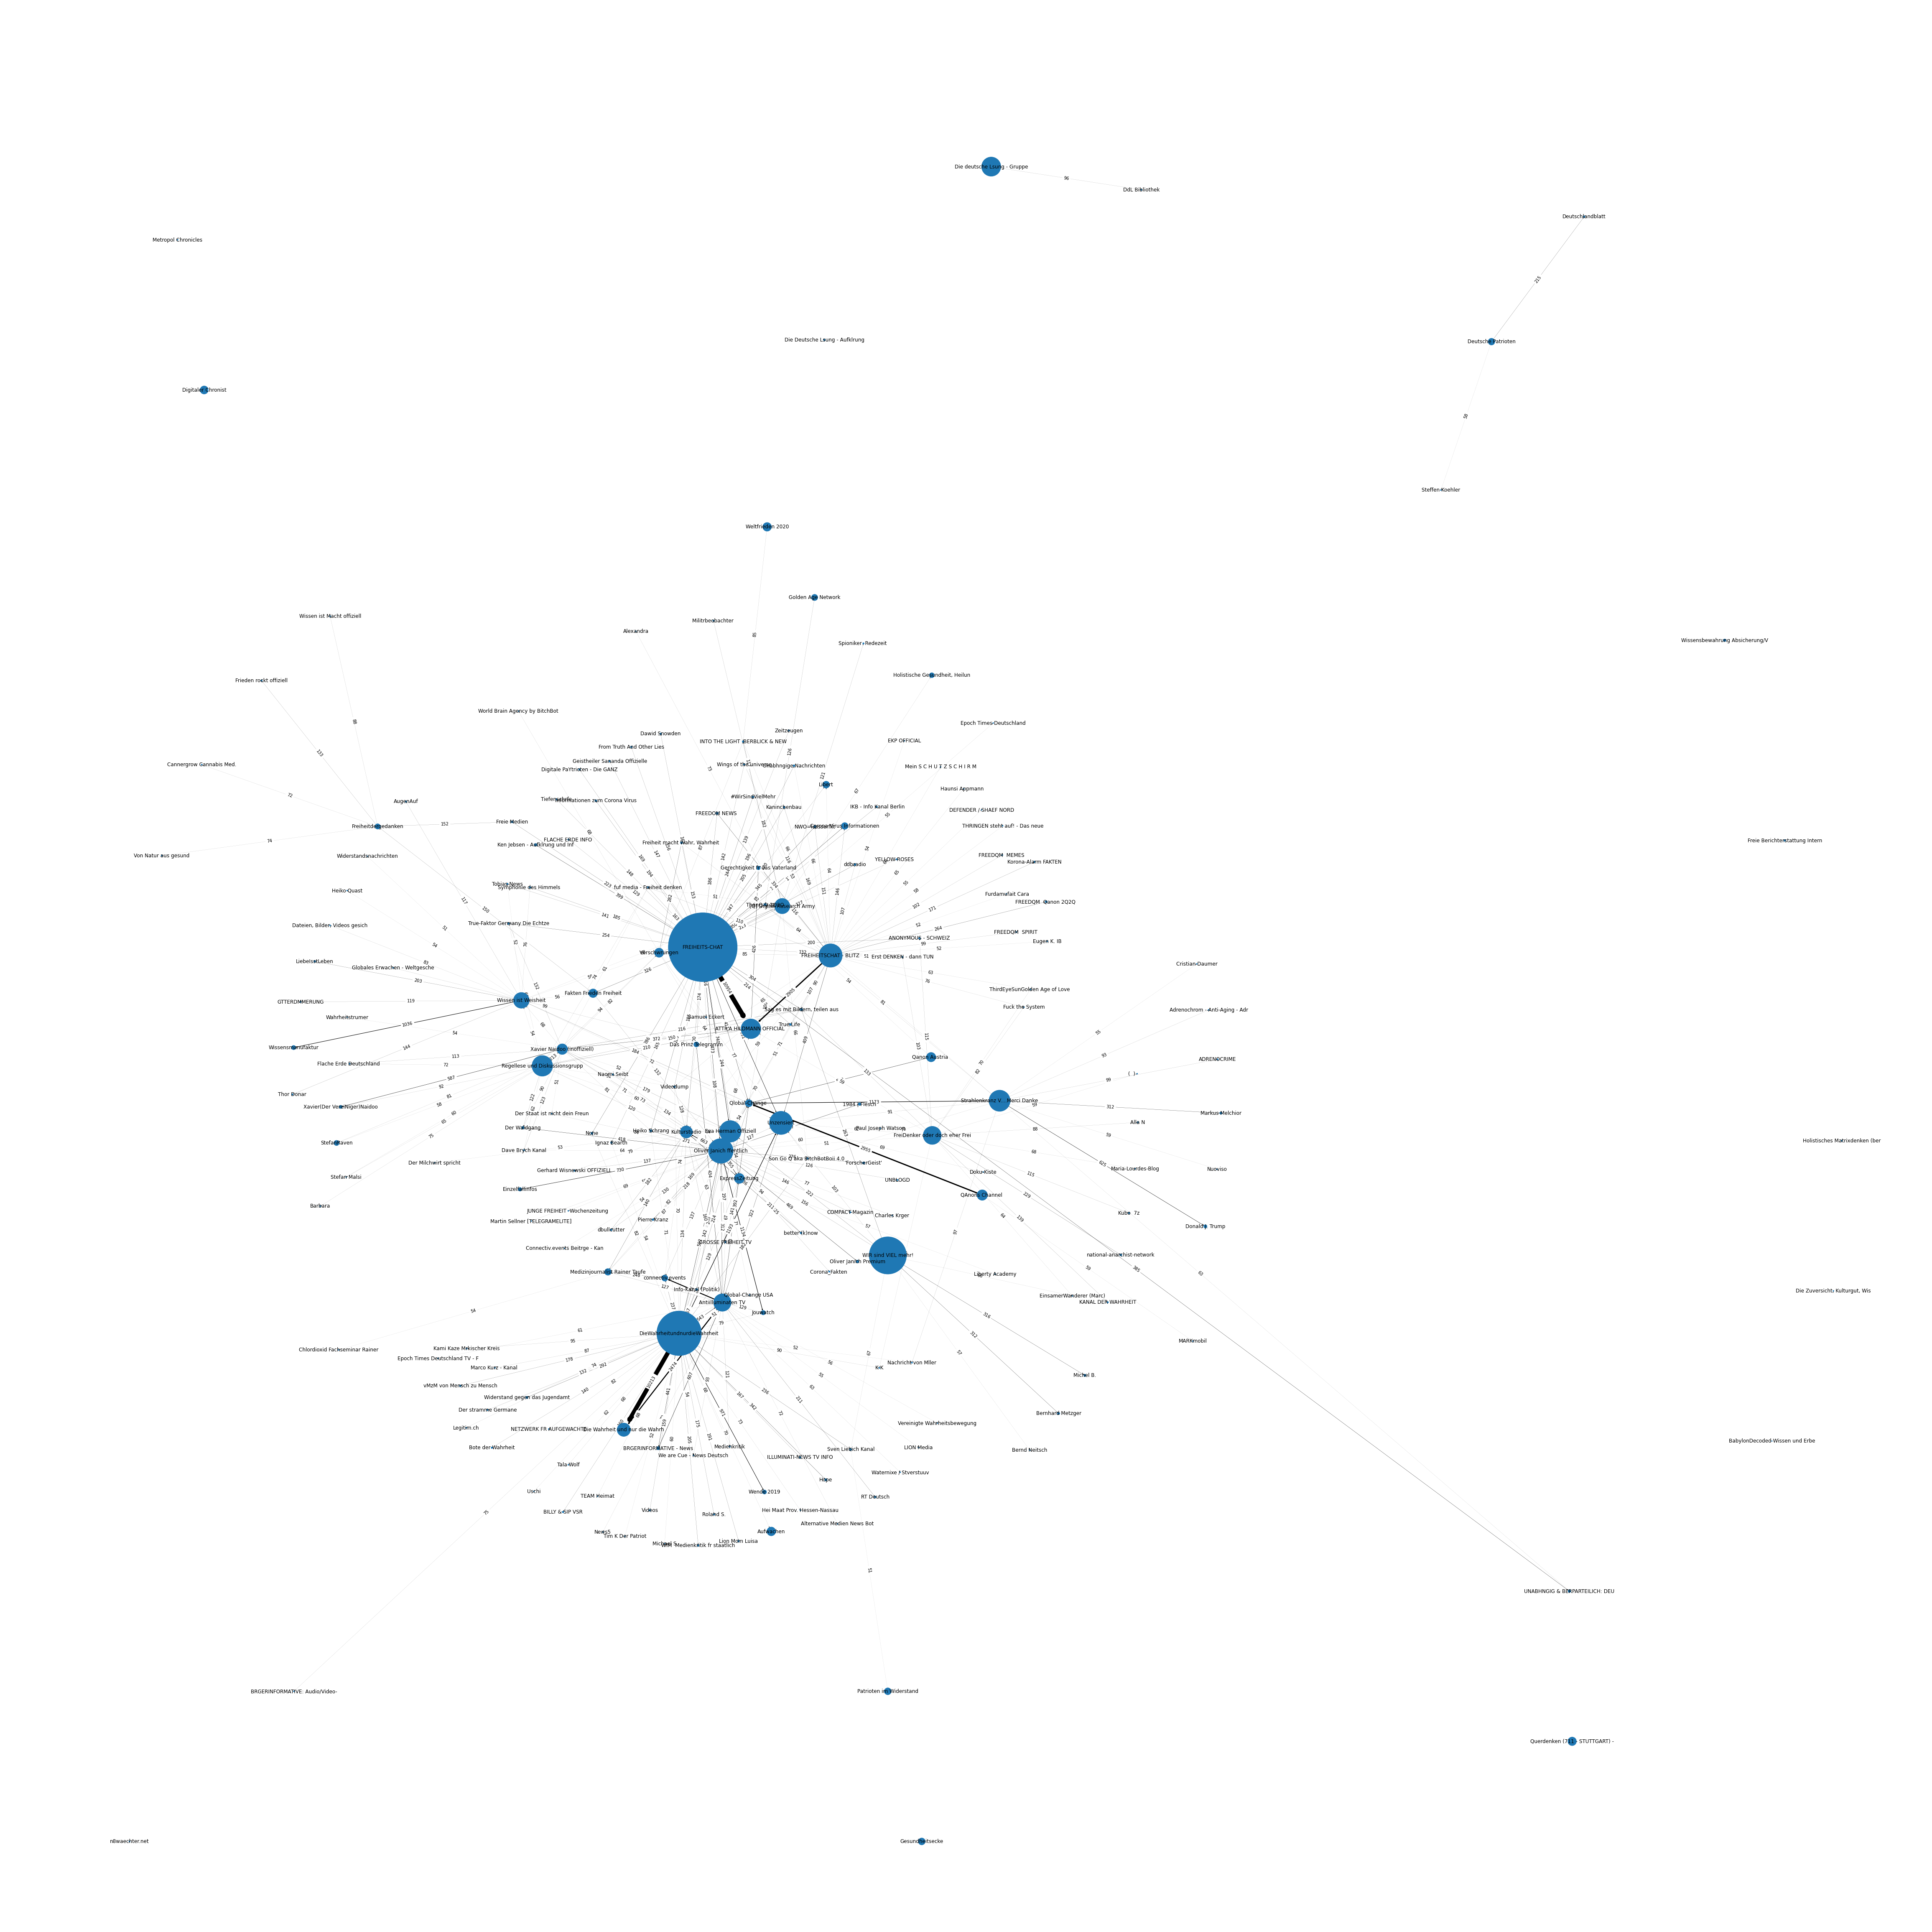

[Stopwatch stopped >>Social Graph Plot<< (13.273s)]


In [55]:
drawSocialPlot(
    generatedSocialGraph,
    configFactorEdge = 1000,
    configFactorNode = 10,
    configArrowSize = 5,
    configPlotWidth = 64,
    configPlotHeight = 64,
    outputFilename = "social-graph.png"
)

## Word Clouds

In [56]:
# TODO: Difference capital letters?
# TODO: Context?
# TODO: Improve stop words
# TODO: Only on valid text?

"""
WordCloud

param   filePath    String (set to "global" if you want to process all messages)
param   label       filename in outputdir
param   filterList  Exclude list
"""

def plotWordCloud(filePath, label, filterList):
    
    gloStartStopwatch("Word Cloud")

    if(filePath != "global"):
        dfMessages = dictMessages[filePath].copy()
    else:
        dfMessages = dfAllDataMessages.copy()
    
    print("- Start transform text to global text string")
    textList = []
    for index, row in dfMessages.iterrows():
        textList.append(" " + row["procTDText"])
        
    textString = ''.join(textList)
    
    germanStopWordsList = nltk.corpus.stopwords.words('german')
    germanStopWordsList.append("http")
    germanStopWordsList.append("https")
    germanStopWordsList.append("ja")
    germanStopWordsList.append("nein")
    germanStopWordsList.append("mehr")
    germanStopWordsList.append("mal")
    germanStopWordsList.append("schon")
    germanStopWordsList.append("immer")
    germanStopWordsList.append("wurde")
    germanStopWordsList.append("wurden")
    germanStopWordsList.append("sei")
    germanStopWordsList.append("sein")
    germanStopWordsList.append("viel")
    germanStopWordsList.append("viele")
    germanStopWordsList.append("wegen")
    germanStopWordsList.append("müssen")
    germanStopWordsList.append("geht")
    germanStopWordsList.append("gibt")
    germanStopWordsList.append("wer")
    germanStopWordsList.append("wie")
    germanStopWordsList.append("was")
    germanStopWordsList.append("macht")
    germanStopWordsList.append("machen")
    germanStopWordsList.append("machte")
    germanStopWordsList.append("kommen")
    germanStopWordsList.append("kommt")
    germanStopWordsList.append("glaube")
    germanStopWordsList.append("glaubst")
    germanStopWordsList.append("tun")
    germanStopWordsList.append("wäre")
    germanStopWordsList.append("sagte")
    germanStopWordsList.append("sagten")
    germanStopWordsList.append("hat")
    germanStopWordsList.append("hast")
    germanStopWordsList.append("haben")
    germanStopWordsList.append("habt")
    germanStopWordsList.append("statt")
    germanStopWordsList.append("genau")
    germanStopWordsList.append("sagen")
    germanStopWordsList.append("sagte")
    germanStopWordsList.append("sagten")
    germanStopWordsList.append("bitte")
    germanStopWordsList.append("bitten")
    germanStopWordsList.append("danke")
    germanStopWordsList.append("dank")
    germanStopWordsList.append("sollen")
    germanStopWordsList.append("soll")
    germanStopWordsList.append("sollte")
    germanStopWordsList.append("sehen")
    germanStopWordsList.append("seht")
    germanStopWordsList.append("zeigen")
    germanStopWordsList.append("zeigt")
    germanStopWordsList.append("sei")
    germanStopWordsList.append("sein")
    germanStopWordsList.append("seid")
    germanStopWordsList.append("seit")
    germanStopWordsList.append("laut")
    germanStopWordsList.append("lauten")
    germanStopWordsList.append("sehen")
    germanStopWordsList.append("seht")
    germanStopWordsList.append("haben")
    germanStopWordsList.append("hat")
    germanStopWordsList.append("hätten")
    germanStopWordsList.append("sagte")
    germanStopWordsList.append("sag")
    germanStopWordsList.append("sagt")
    germanStopWordsList.append("ab")
    germanStopWordsList.append("bei")
    germanStopWordsList.append("beim")
    germanStopWordsList.append("denen")
    germanStopWordsList.append("gab")
    germanStopWordsList.append("ab")
    
    for fItem in filterList:
        germanStopWordsList.append(fItem)
    
    print("- Start generate cloud")
    wordcloud = WordCloud(
                background_color="black",
                width=1920,
                height=1080,
                stopwords=germanStopWordsList
            ).generate(textString)
    wordcloud.to_file(dir_var_output + "wordcloud-" + label + ".png")
    
    print()
    print("Top 20 occ:\n" + str(pd.Series(wordcloud.words_).head(20)))
    print()
    
    print("- Start generate figure")
    plt.figure(figsize=(14, 14))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()
    
    gloStopStopwatch("Word Cloud")

[Stopwatch started >>Word Cloud<<]
- Start transform text to global text string
- Start generate cloud

Top 20 occ:
Deutschland    1.000000
Menschen       0.777668
Video          0.774704
Polizei        0.609190
bereit         0.540020
Berlin         0.465909
Corona         0.420455
Prozent        0.414032
neue           0.398715
AfD            0.389822
dabei          0.381423
Fall           0.371047
Welt           0.368577
and            0.368577
Kinder         0.364625
a              0.362154
heute          0.361660
deutschen      0.354249
Trump          0.350296
seien          0.347332
dtype: float64

- Start generate figure


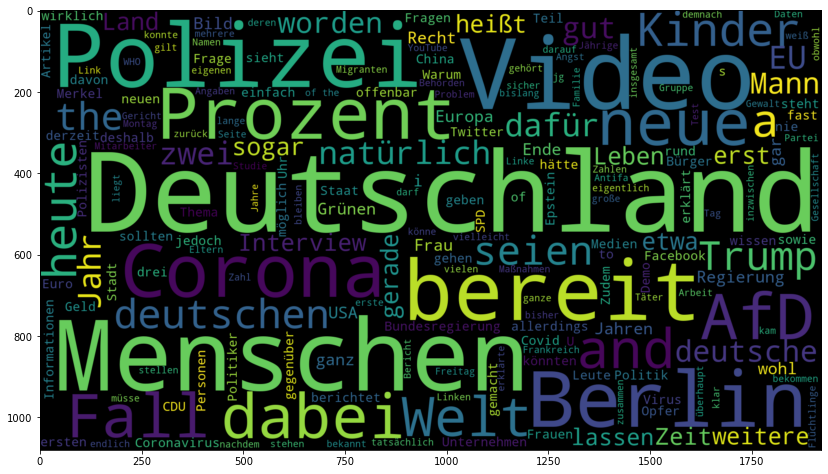

[Stopwatch stopped >>Word Cloud<< (11.614s)]


In [57]:
# Oliver Janich öffentlich (public_channel)
plotWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-25-janich",
    "pc-janich",
    []
)

[Stopwatch started >>Word Cloud<<]
- Start transform text to global text string
- Start generate cloud

Top 20 occ:
Menschen       1.000000
Deutschland    0.669903
heute          0.593620
Corona         0.540915
Video          0.450069
Welt           0.424411
bereit         0.408460
Coronavirus    0.384189
Kinder         0.383495
Zeit           0.382108
Liebe Eva      0.371706
China          0.360610
Virus          0.348128
Leben          0.321775
Zuschrift      0.319001
Berlin         0.316921
USA            0.306519
Polizei        0.291956
Eva Herman     0.283634
gerade         0.278086
dtype: float64

- Start generate figure


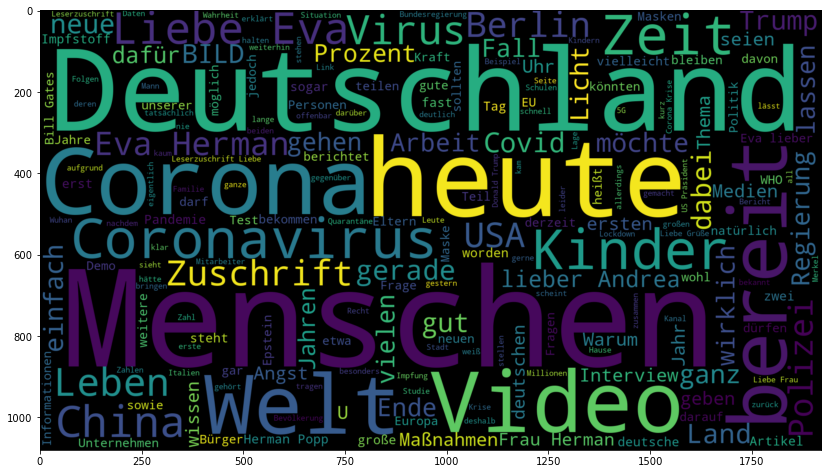

[Stopwatch stopped >>Word Cloud<< (9.988s)]


In [58]:
# Eva Herman Offiziell (public_channel)
plotWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-27-evaherman",
    "pc-evaHerman",
    []
)

[Stopwatch started >>Word Cloud<<]
- Start transform text to global text string
- Start generate cloud

Top 20 occ:
Deutschland                  1.000000
Corona                       0.751402
Gate                         0.626168
Merkel                       0.593458
Menschen                     0.576636
WOLF ATTILAHILDMANN          0.486916
China                        0.484112
ATTILAHILDMANN CHAT          0.457009
CHAT BEITRETEN               0.453271
BEITRETEN ChatDerFreiheit    0.449533
heute                        0.438318
FOLG                         0.390654
Video                        0.373832
Freiheit                     0.373832
deutschen                    0.363551
einfach                      0.362617
NWO                          0.341121
Welt                         0.302804
ATTILA HILDMANN              0.300935
Zeit                         0.270093
dtype: float64

- Start generate figure


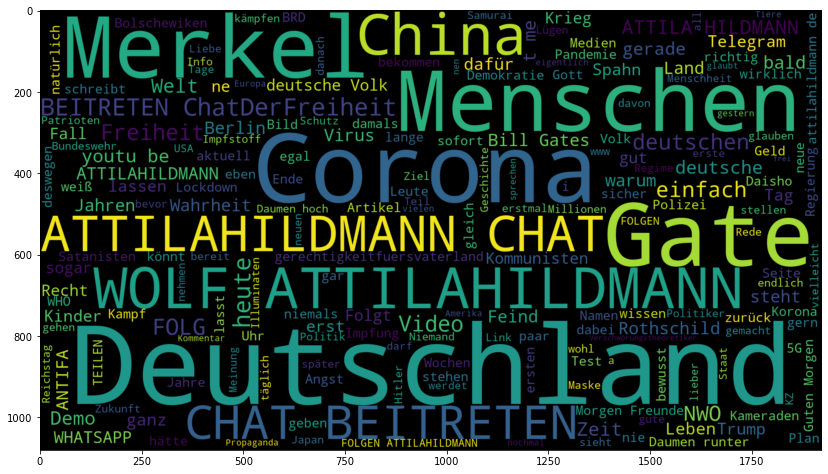

[Stopwatch stopped >>Word Cloud<< (7.714s)]


In [59]:
# ATTILA HILDMANN OFFICIAL (public_channel)
plotWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-25-hildmann",
    "pc-hildmann",
    ["ATTILAHILDMANN CHAT"]
)

[Stopwatch started >>Word Cloud<<]
- Start transform text to global text string
- Start generate cloud

Top 20 occ:
oneLove          1.000000
Menschen         0.256331
Video            0.153799
Deutschland      0.151328
Corona           0.142063
Kinder           0.126004
Wahrheit         0.119827
Berlin           0.114886
Kanäle           0.109944
Liebe            0.096973
Warum            0.096973
einfach          0.092032
heute            0.089561
Zeit             0.088326
Polizei          0.088326
Demo             0.088326
bereit           0.084620
Welt             0.080914
lassen           0.075355
Xavier Naidoo    0.075355
dtype: float64

- Start generate figure


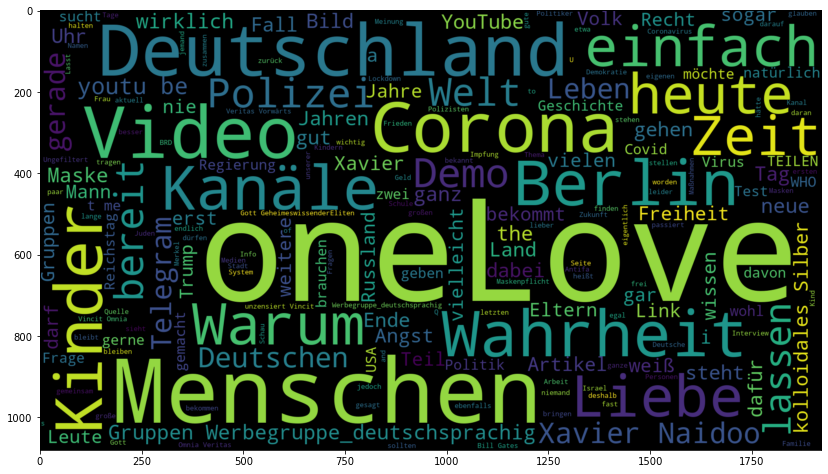

[Stopwatch stopped >>Word Cloud<< (6.367s)]


In [60]:
# Xavier Naidoo (public_channel)
plotWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-25-xavier",
    "pc-xavier",
    ["xavier_naidoo", "Xavier_Naidoo", "politische_bildersprueche", "einmal_hin_alles_drin"]
)

[Stopwatch started >>Word Cloud<<]
- Start transform text to global text string
- Start generate cloud

Top 20 occ:
Menschen       1.000000
Deutschland    0.669825
Video          0.579176
heute          0.493124
einfach        0.491038
Wahrheit       0.437370
Warum          0.415379
gut            0.402758
Leben          0.386282
Berlin         0.379494
Kinder         0.367014
Welt           0.365105
Leute          0.356797
wissen         0.343504
Trump          0.332968
Polizei        0.323246
bereit         0.321690
Recht          0.317165
Zeit           0.311225
Corona         0.299699
dtype: float64

- Start generate figure


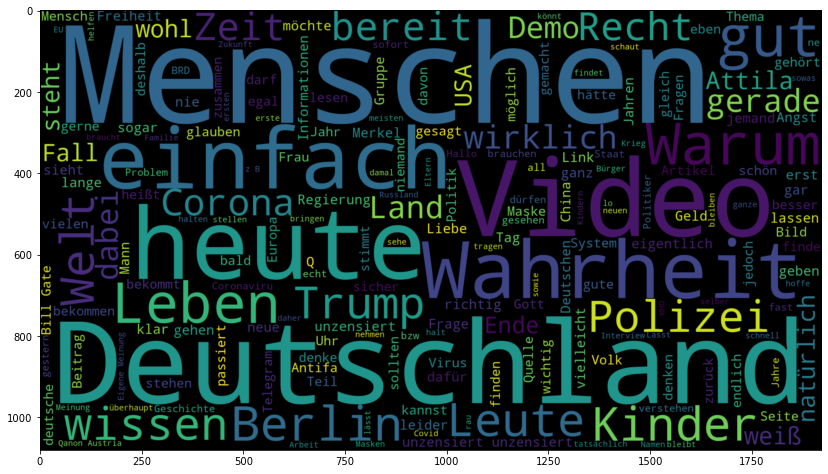

[Stopwatch stopped >>Word Cloud<< (101.063s)]


In [61]:
# Just for test purposes
plotWordCloud(
    "global",
    "global",
    []
)

## Test Sutff

In [62]:
#G_weighted = nx.DiGraph()

#G_weighted.add_edge('A', 'B', weight=8)
#G_weighted.add_edge('A', 'C', weight=2)
#G_weighted.add_edge('A', 'D', weight=5)
#G_weighted.add_edge('C', 'D', weight=3)
#G_weighted.add_edge('A', 'C', weight=2)
#G_weighted.add_edge('D', 'C', weight=10)
#G_weighted.add_edge('C', 'E', weight=5)

#G_weighted.add_node('A', weight=500)
#G_weighted.add_node('C', weight=300)
#G_weighted.add_node('D', weight=500)
#G_weighted.add_node('B', weight=600)
#G_weighted.add_node('E', weight=500)

In [63]:
#from ipywidgets import interact
#import ipywidgets as widgets

In [64]:
#interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
#         generator={
#             'lobster': random_lobster,
#             'power law': powerlaw_cluster,
#             'Newman-Watts-Strogatz': newman_watts_strogatz,
#             u'Erdős-Rényi': erdos_renyi,
#         });

### Concordance

In [65]:
#tbd